#Time Series Data   

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

stock_data = yf.download('AAPL', start='2024-01-01')
stock_data.head(10)

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-01-02,184.081497,186.857993,182.346189,185.578815,82488700
2024-01-03,182.703156,184.319476,181.890032,182.673409,58414500
2024-01-04,180.382812,181.552899,179.361461,180.620788,71983600
2024-01-05,179.658951,181.225688,178.657435,180.462163,62379700
2024-01-08,184.002182,184.041855,179.976269,180.561312,59144500
2024-01-09,183.585693,183.595604,181.195922,182.375934,42841800
2024-01-10,184.626877,184.835105,182.375930,182.802328,46792900
2024-01-11,184.031937,185.479686,182.078474,184.973958,49128400


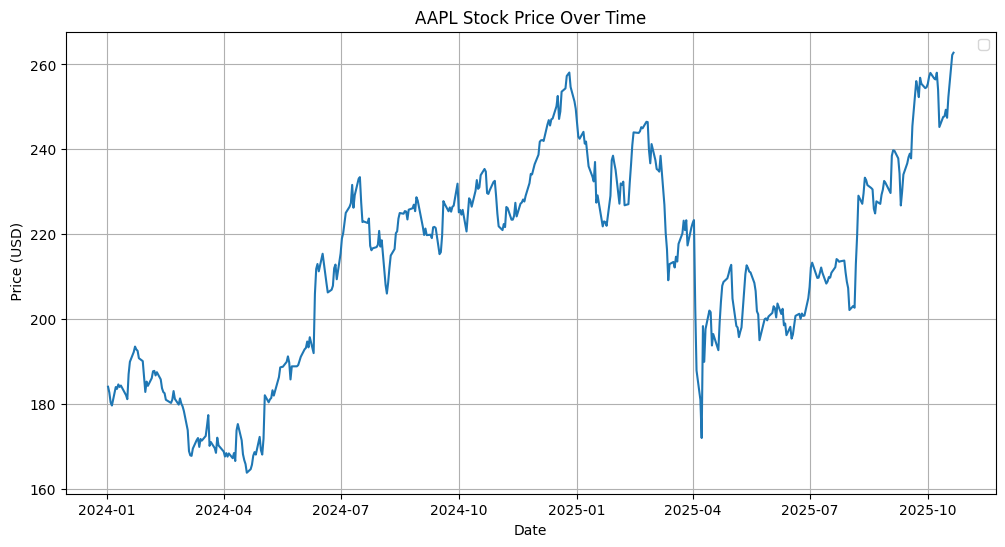

In [2]:
plt.figure(figsize=(12,6))
plt.plot(stock_data['Close'])
plt.title('AAPL Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel(' Price (USD)')
plt.grid(True)
plt.legend()
plt.show()

#Classical Time Series Decomposition

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition_additive = seasonal_decompose(stock_data['Close'], model='additive', period=30)

In [5]:
trend = decomposition_additive.trend
seasonal = decomposition_additive.seasonal
residual = decomposition_additive.resid

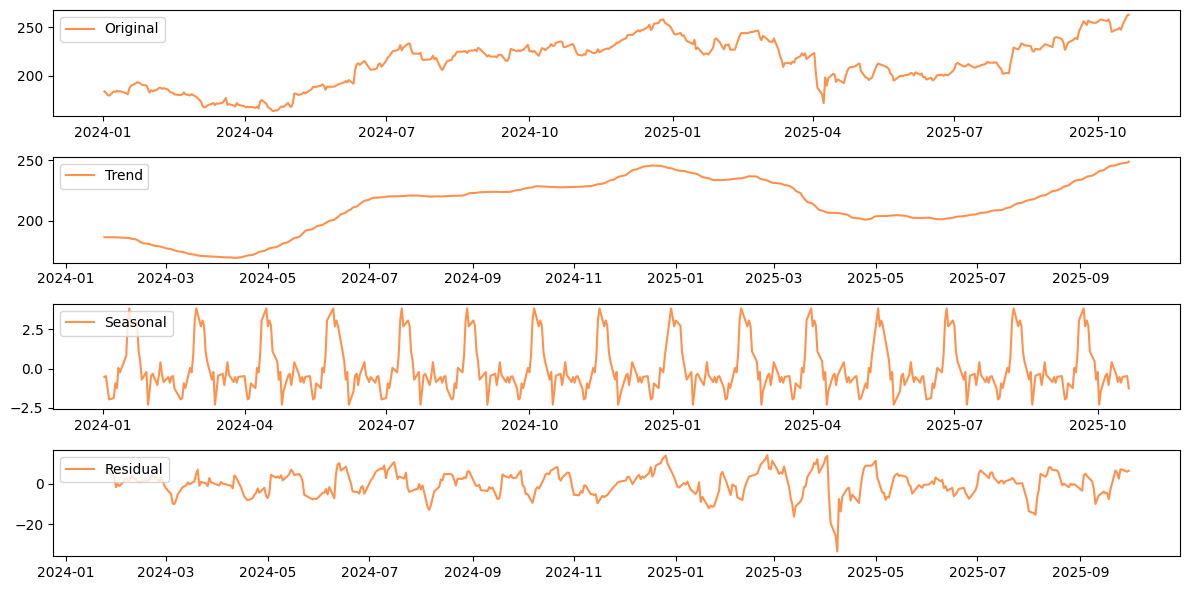

In [6]:
plt.figure(figsize=(12,6))
plt.subplot(411)
plt.plot(stock_data['Close'], label='Original', color='#FF914D')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend', color='#FF914D')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal', color='#FF914D')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residual', color='#FF914D')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

#STL Decompostion

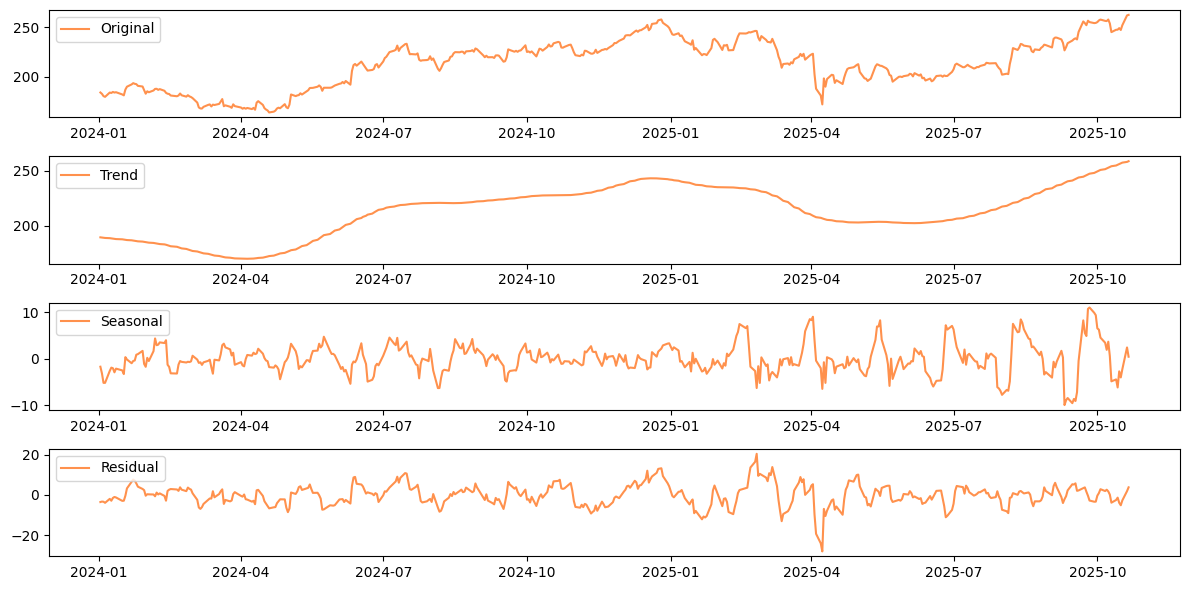

In [7]:
from statsmodels.tsa.seasonal import STL

stl = STL(stock_data['Close'], period=30)
res = stl.fit()

plt.figure(figsize=(12,6))
plt.subplot(411)
plt.plot(stock_data['Close'], label='Original', color='#FF914D')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(res.trend, label='Trend', color='#FF914D')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(res.seasonal, label='Seasonal', color='#FF914D')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(res.resid, label='Residual', color='#FF914D')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

#Stationarity Test

In [8]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(stock_data['Close'])
print(f'ADF Statistic: {round(adf_test[0],3)}')
print(f'p-value: {round(adf_test[1], 3)}')
print(f'Critical Values:')
for key, value in adf_test[4].items():
    print(f'\t{key}: {round(value, 3)}')

ADF Statistic: -1.447
p-value: 0.559
Critical Values:
	1%: -3.445
	5%: -2.868
	10%: -2.57


In [9]:
from statsmodels.tsa.stattools import kpss

kpss_test = kpss(stock_data['Close'], regression='ct')

print('KPSS Test Results: ')
print(f'KPSS Statistic: {round(kpss_test[0],2)}')
print(f'p-value: {kpss_test[1]}')
print(f'Critical Values:')
for key, value in kpss_test[3].items():
    print(f'  {key}: {value}')

KPSS Test Results: 
KPSS Statistic: 0.45
p-value: 0.01
Critical Values:
  10%: 0.119
  5%: 0.146
  2.5%: 0.176
  1%: 0.216


/tmp/ipython-input-2332053937.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test = kpss(stock_data['Close'], regression='ct')


 weak stationary series: 0.184, p-value: 0.0004
strong stationary series: 0.068, p-value: 0.6109


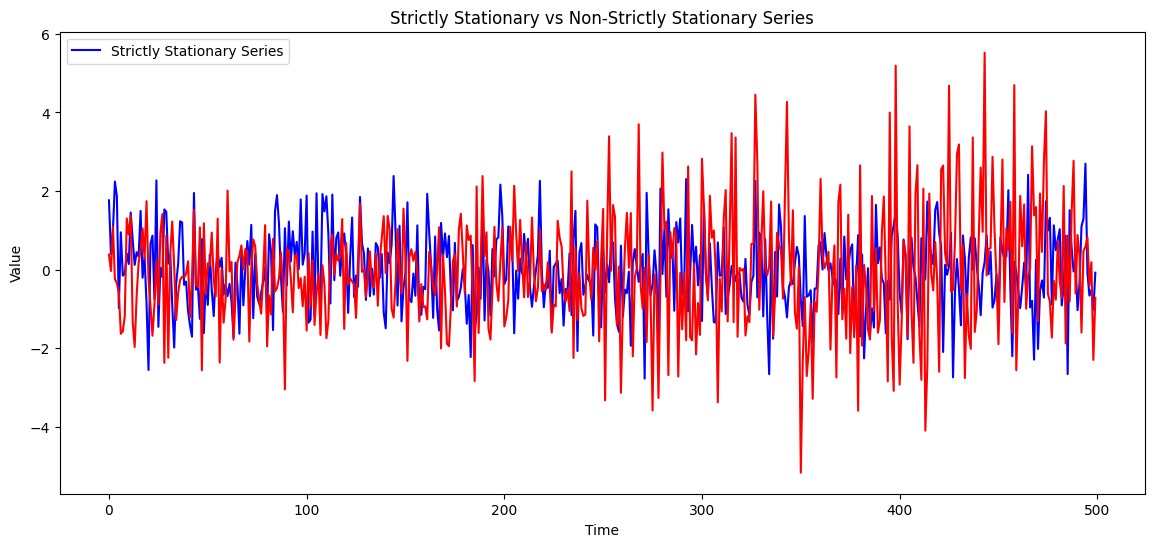

In [18]:
from os.path import split
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp

# Generating synthetic data for demonstration
np.random.seed(0)
n = 500

# Strictly stationary series: normal distributed random noise
stationary_series = np.random.normal(0, 1, n)

# Non-strictly stationary series: changing variance
non_strict_stationary_series = np.concatenate(( # Changed set to tuple
    np.random.normal(0, 1, n // 2),
    np.random.normal(0, 2, n // 2)
    ))

#Function to split the series into two halves and perform the K-S test
def ks_test_stationarity(series):
   split = len(series) // 2
   series_first_half = series[:split]
   series_second_half = series[split:]
   stat, p_value = ks_2samp(series_first_half, series_second_half)
   return stat, p_value

# Moved function calls and plotting outside the function
ks_test_strict, ks_pvalue_strict = ks_test_stationarity(stationary_series) # Corrected variable name
ks_test_non_strict, ks_pvalue_non_strict = ks_test_stationarity(non_strict_stationary_series)

plt.figure(figsize=(14,6))
plt.plot(stationary_series, label='Strictly Stationary Series', color='blue')
plt.title('Strictly Stationary vs Non-Strictly Stationary Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.plot(non_strict_stationary_series, label='Non-Strictly Stationary Series', color='red')
print(f' weak stationary series: {ks_test_non_strict}, p-value: {ks_pvalue_non_strict:.4f}')
print(f'strong stationary series: {ks_test_strict}, p-value: {ks_pvalue_strict:.4f}')
